In [8]:
import os
import shutil
for i in os.listdir():
    if '.html' in i:
        os.rename(i,"~"+i)
        src = open("~" + i,'r')
        dst = open("templates/"+i,"w")
        dst.write(src.read().replace('assets','/static'))
        src.close()
        dst.close()
        os.remove("~"+i)

os.rename('static','~static')
os.rename('assets','static')
shutil.rmtree("~static")

In [1]:
import modelos.NLPbasics as nlp

In [2]:
import sqlite3
import pandas as pd
with sqlite3.connect('fakenewsbr.db') as con:
    fakes = pd.read_sql("Select * from tblFakeNews",con)

In [3]:
modelo_basico = nlp.NLPbasics()
modelo_basico.build_model(fakes.desc_full_text.values)

In [4]:
modelo_basico.fit(fakes.desc_full_text.values, fakes.id_type.values)

In [5]:
modelo_basico.predict("Teste")

0.16735537190082644

In [6]:
import joblib
modelos = ['tf', 'tf_norm', 'cossim', 'tfidf', 'prob']
for i in modelos:
    modelo_basico.default_method = i
    joblib.dump(modelo_basico,f'modelos/modelo_basico_{i}.joblib')

In [7]:
#m = joblib.load('modelos/modelo_basico.joblib')

modelos = ['tf', 'tf_norm', 'cossim', 'tfidf', 'prob']
for i in modelos:
    m = joblib.load(f'modelos/modelo_basico_{i}.joblib')    
    print(f'{i}:',m.predict(fakes.desc_full_text.values[0]))

tf: 0.14038801411264992
tf_norm: 0.5027176285713673
cossim: 0.5027176285713673
tfidf: 0.5027193935123976
prob: 2.208976534629815e-101


In [9]:
fakes[['id_type', 'desc_full_text']].head(2)

,id_type,desc_full_text
0,fake,Kátia Abreu diz que vai colocar sua expulsão e...
1,fake,"Dr. Ray peita Bolsonaro, chama-o de conservad..."


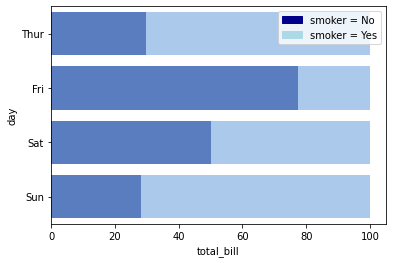

In [31]:
labels = ["Modelo 01", "Modelo 02"]
fake = [70, 40]
true = [30, 60]

#fig, ax = plt.subplots()

#bar1 = sns.barplot(x=labels, y="Probabilidade", data=fake)

#ax.bar(labels, fake, label = 'fake')
#ax.bar(labels, true, label = 'true')
#ax.set_title("Resultados")
#ax.set_ylabel("Probabilidades")
#ax.legend()
#plt.savefig('static/img/predicao.png')
#plt.show()
sns.set_color_codes("pastel")
tips = sns.load_dataset("tips")
total = tips.groupby('day')['total_bill'].sum().reset_index()
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]
# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(y="day",  x="total_bill", data=total, color='b')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
sns.set_color_codes("muted")
bar2 = sns.barplot(y="day", x="total_bill", data=smoker, color='b')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])
#plt.savefig('static/img/predicao.png')
# show the graph
plt.show()



In [ ]:
import re
def readfake(path, number):
    with open(f'{path}{number}.txt', encoding='utf-8') as f:
        s = f.read()
    return s

def nextfakeid(database, table):
    con = sqlite3.connect(database)
    cur = con.cursor()
    for row in cur.execute("Select MAX(id_news) from tblFakeNews"):
        max = row    
    con.close()
    return max[0]

def faketodataframe(path, number, type_fake):
    columns = ['id_reference', 'id_type','source','author', 'link', 'category',
       'dt_publication', 'vl_qtde_tokens', 'vl_qtde_words_without_punctuation',
       'vl_qtde_types', 'vl_qtde_links_inside_news',
       'vl_qtde_words_upper_case', 'vl_qtde_verbs',
       'vl_qtde_subjuntive_and_imperative_verbs', 'vl_qtde_nouns',
       'vl_qtde_adjectives', 'vl_qtde_adverbs', 'vl_qtde_modal_verbs',
       'vl_qtde_singular_first_personal_pronouns',
       'vl_qtde_plural_first_personal_pronouns', 'vl_qtde_pronouns',
       'vl_qtde_pausality', 'vl_qtde_characters', 'vl_avg_sentence_length',
       'vl_avg_word_length', 'vl_percentage_news_speeling_errors',
       'vl_emotiveness', 'vl_diversity', 'desc_full_text']
    data = pd.read_csv(f'{path}/{type_fake}-meta-information/{number}-meta.txt', header=None,sep=';').T    
    if len(data.columns)==25:
        data.columns = columns[3:-1]
    else:        
        #print(f'Texto={number} Colunas={len(data.columns)}',end=' ')
        data.columns = columns[4:-1]
        data['author'] = "Não Definido"        
    data['id_reference'] = number
    data['id_type'] = type_fake
    data['source'] = 'fakebr'
    data['desc_full_text'] = readfake(f'{path}/{type_fake}/',number)
    return data.copy()

cols = ['author', 'link', 'category', 'dt_publication', 'vl_qtde_tokens',
       'vl_qtde_words_without_punctuation', 'vl_qtde_types',
       'vl_qtde_links_inside_news', 'vl_qtde_words_upper_case',
       'vl_qtde_verbs', 'vl_qtde_subjuntive_and_imperative_verbs',
       'vl_qtde_nouns', 'vl_qtde_adjectives', 'vl_qtde_adverbs',
       'vl_qtde_modal_verbs', 'vl_qtde_singular_first_personal_pronouns',
       'vl_qtde_plural_first_personal_pronouns', 'vl_qtde_pronouns',
       'vl_qtde_pausality', 'vl_qtde_characters', 'vl_avg_sentence_length',
       'vl_avg_word_length', 'vl_percentage_news_speeling_errors',
       'vl_emotiveness', 'vl_diversity', 'id_reference', 'id_type',
       'source', 'desc_full_text']
df_all = pd.DataFrame(columns = cols)
for file in os.listdir('database/fake-meta-information'): 
    number = re.search("(\d+)", file).groups()[0]
    df = faketodataframe('./database',number,'fake')
    df_all = df_all.append(df)        
for file in os.listdir('database/true-meta-information'):         
    number = re.search("(\d+)", file).groups()[0]    
    df = faketodataframe('./database',number,'true')
    df_all = df_all.append(df)
df_all['id_news'] = df_all.reset_index(drop=True).index + 1
with sqlite3.connect('fakenewsbr.db') as con:
    df_all.to_sql('tblFakeNews',con,if_exists='append', index=False)

In [41]:
import pandas as pd
import sqlite3

def getrandomfake():
    with sqlite3.connect('fakenewsbr.db') as con:
        fakes = pd.read_sql("Select desc_full_text from tblFakeNews",con)
        return fakes.iloc[np.random.randint(fakes.shape[0]),0] 

def getmodels():
    with sqlite3.connect('fakenewsbr.db') as con:
        df_models = pd.read_sql("Select * from tblModels",con)
        return df_models

def getmodelslist(df, nm_model):
    return df[nm_model].values

getmodelslist(getmodels(),'nm_model')

array(['WORD2VECLIGHTGBM', 'TopN'], dtype=object)

In [32]:
import pandas as pd
import pickle
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import lightgbm as lgbm
import nltk as nltk

def modelo(novo_texto):
    """
    Replicando os tratamentos que foram feitos para desenvolver o modelo, carregando o modelo que foi treinado
    e escorando.
    """
    output=pd.DataFrame({'texto':[novo_texto]})
    data=output.copy()
    stemmer=SnowballStemmer('portuguese')
    stopwords = nltk.corpus.stopwords.words('portuguese')
    
    data['limpa']=data['texto'].apply(lambda x:" ".join([stemmer.stem(i) for i in x.split() if _i not in stopwords]).lower())
    data['Uppercase'] = data['texto'].str.findall(r'[A-Z]').str.len()
    data['Lowercase'] = data['texto'].str.findall(r'[a-z]').str.len()
    data=data.drop(columns=['texto'])
    data['Total'] = data['limpa'].str.findall(r'[a-z]').str.len()
    data['limpa']=["".join(limpa) for limpa in data['limpa'].values]
    
    data['Razao_Upper_Lower']=data['Uppercase']/data['Lowercase']
    data['Razao_Upper_Total']=data['Uppercase']/data['Total']
    
    data['limpa']=data['limpa'].str.replace("ão","ao")
    data['limpa']=data['limpa'].str.replace("á","a")
    data['limpa']=data['limpa'].str.replace("é","e")
    data['limpa']=data['limpa'].str.replace("í","i")
    data['limpa']=data['limpa'].str.replace("ó","o")
    data['limpa']=data['limpa'].str.replace("ô","o")
    data['limpa']=data['limpa'].str.replace("ú","u")
    data['limpa']=data['limpa'].str.replace("ão","ao")
    data['limpa']=data['limpa'].str.replace("ó","o")
    data['limpa']=data['limpa'].str.replace("é","e")
    data['limpa']=data['limpa'].str.replace(".","")
    data['limpa']=data['limpa'].str.replace(";","")
    data['palavra_7exclamacoes']=data.limpa.str.count(r'!!!!!!!')
    data['palavra_3exclamacoes']=data.limpa.str.count(r'!!!')
    data['palavra_...']=data.limpa.str.count(r'...')
    data['palavra_.....']=data.limpa.str.count(r'.....')
    
    transformador1 = TfidfVectorizer(ngram_range=(1,2),stop_words=stopwords,sublinear_tf=True,max_features=2000,strip_accents='ascii')
    passo1_a = transformador1.fit_transform(data['limpa'])
    Passo1=pd.DataFrame(passo1_a.toarray(),columns=transformador1.get_feature_names())
    
    transformador2 = CountVectorizer(ngram_range=(1,2),stop_words=stopwords,max_features=2000,strip_accents='ascii')
    passo2_a = transformador2.fit_transform(data['limpa'])
    Passo2=pd.DataFrame(passo2_a.toarray(),columns=transformador2.get_feature_names())
    
    transformador3 = CountVectorizer(ngram_range=(1,3),stop_words=stopwords,max_features=500,strip_accents='ascii')
    passo3_a = transformador3.fit_transform(data['limpa'])
    transformador3.get_feature_names() 
    Passo3=pd.DataFrame(passo3_a.toarray(),columns=transformador3.get_feature_names())
    
    frames = [data,Passo1,Passo2,Passo3]
    Base_Final = pd.concat(frames,axis=1)
    
    #Carregando modelo
    modelo_carregado=pickle.load(open("modelos/Modelo_lightgbm061021.sav", 'rb'))
    
    ordem_variaveis=['Uppercase',
        'Lowercase',
        'Total',
        'Razao_Upper_Lower',
        'Razao_Upper_Total',
        'palavra_...',
        'palavra_.....',
        'acus',
        'afirm',
        'agor',
        'ai',
        'alto',
        'ano',
        'apos',
        'atraves',
        'autor',
        'bairr',
        'bem',
        'brasil',
        'brasileiros',
        'cam',
        'canc',
        'car',
        'cheg',
        'cont',
        'defes',
        'desd',
        'dess',
        'dest',
        'dia',
        'dilm',
        'diss',
        'distrit',
        'durant',
        'entanto',
        'escond',
        'estud',
        'evident',
        'ex',
        'ex govern',
        'exist',
        'fal',
        'famil',
        'feir',
        'feira',
        'form',
        'g1',
        'ganh',
        'gent',
        'geral',
        'ha',
        'hoj',
        'hoje',
        'homens',
        'impost',
        'intern',
        'ja',
        'jornal',
        'lav',
        'lav jato',
        'lei',
        'lug',
        'lul',
        'maior',
        'manha dest',
        'mar',
        'marc',
        'mes',
        'milho',
        'milit',
        'ministr',
        'nest',
        'noss',
        'outr',
        'pais',
        'par',
        'part',
        'paul',
        'ped',
        'pel',
        'pen',
        'pesquis',
        'pod',
        'poder',
        'polic',
        'polit',
        'politico',
        'possu',
        'preso',
        'process',
        'psdb',
        'public',
        'quarta',
        'quas',
        'quinta',
        'receb',
        'regia',
        'regional',
        'represent',
        'respons pel',
        'rio',
        'sa',
        'segund',
        'send',
        'senhor',
        'ser',
        'servic',
        'sit',
        'so',
        'sob',
        'sobr',
        'suprem',
        'tal',
        'tambem',
        'tent',
        'ter',
        'terror',
        'testemunh',
        'tip',
        'tod',
        'torn',
        'trat',
        'tribunal',
        'tribunal federal',
        'tud',
        'ultim',
        'vez',
        'voc']
    #Caso não haja a palavra no texto temos que criar a coluna:
    for variavel in ordem_variaveis:
        if variavel not in Base_Final.columns:
            Base_Final[variavel]=0

    Base_Final=Base_Final.loc[:,~Base_Final.columns.duplicated()]    
    return(modelo_carregado.predict_proba(Base_Final[ordem_variaveis])[:,0])

In [34]:
modelo(getrandomfake())

C:\Users\ghdaru\AppData\Local\Temp/ipykernel_24012/3606952700.py:41: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['limpa']=data['limpa'].str.replace(".","")
C:\Users\ghdaru\AppData\Local\Temp/ipykernel_24012/3606952700.py:198: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Base_Final[variavel]=0


array([0.96803869])

In [40]:
def getfakedatabase():
    with sqlite3.connect('fakenewsbr.db') as con:
        fakes = pd.read_sql("Select * from tblFakeNews",con)
    return fakes.iloc[:2,:].to_json(orient='records')

getfakedatabase()


'[{"id_news":1,"id_reference":1,"id_type":"fake","source":"fakebr","author":"mrk","link":"https:\\/\\/ceticismopolitico.com\\/2017\\/11\\/30\\/katia-abreu-diz-que-vai-colocar-sua-expulsao-em-uma-moldura-mas-nao-para-de-reclamar\\/","category":"politica","dt_publication":"2017-11-30","vl_qtde_tokens":211.0,"vl_qtde_words_without_punctuation":185.0,"vl_qtde_types":120.0,"vl_qtde_links_inside_news":0,"vl_qtde_words_upper_case":6.0,"vl_qtde_verbs":30.0,"vl_qtde_subjuntive_and_imperative_verbs":1.0,"vl_qtde_nouns":46.0,"vl_qtde_adjectives":7.0,"vl_qtde_adverbs":13.0,"vl_qtde_modal_verbs":5.0,"vl_qtde_singular_first_personal_pronouns":2.0,"vl_qtde_plural_first_personal_pronouns":0.0,"vl_qtde_pronouns":26.0,"vl_qtde_pausality":2.0,"vl_qtde_characters":815.0,"vl_avg_sentence_length":14.2308,"vl_avg_word_length":4.40541,"vl_percentage_news_speeling_errors":0.0,"vl_emotiveness":0.263158,"vl_diversity":0.648649,"desc_full_text":"K\\u00e1tia Abreu diz que vai colocar sua expuls\\u00e3o em uma mold

In [3]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [7]:
from joblib import dump, load
from sklearn.feature_extraction.text import CountVectorizer

text = CountVectorizer()
text.fit(["joao juca teste"])


dump(text,'modelos/daru.joblib')


['modelos/daru.joblib']

In [5]:
#eval("class daru(): pass")
import fakenewstools as fn
x = fn.evaluatemodel([""],'daru.joblib')
x


**************Nome do Arquivo: daru.joblib *********fakenewstools*********modelos.darumodulo*******


0.5

In [8]:
#https://www.statworx.com/en/blog/how-to-build-a-machine-learning-api-with-python-and-flask/

#eval("class daru():\\n\\t pass")
class daru():
    pass

In [10]:
daru.__module__= "jupyternote"

In [ ]:
#https://docs.python.org/pt-br/3/tutorial/modules.html

In [4]:
from modelos import *
darumodulo.daru.__module__

'modelos.darumodulo'

In [6]:
import importlib.util
import sys

# For illustrative purposes.
import tokenize
file_path = tokenize.__file__
module_name = tokenize.__name__

spec = importlib.util.spec_from_file_location(module_name, file_path)
module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = module
spec.loader.exec_module(module)

In [10]:
sys.modules

{'sys': <module 'sys' (built-in)>,
 'builtins': <module 'builtins' (built-in)>,
 '_frozen_importlib': <module 'importlib._bootstrap' (frozen)>,
 '_imp': <module '_imp' (built-in)>,
 '_thread': <module '_thread' (built-in)>,
 '_warnings': <module '_warnings' (built-in)>,
 '_weakref': <module '_weakref' (built-in)>,
 '_io': <module 'io' (built-in)>,
 'marshal': <module 'marshal' (built-in)>,
 'nt': <module 'nt' (built-in)>,
 'winreg': <module 'winreg' (built-in)>,
 '_frozen_importlib_external': <module 'importlib._bootstrap_external' (frozen)>,
 'time': <module 'time' (built-in)>,
 'zipimport': <module 'zipimport' (frozen)>,
 '_codecs': <module '_codecs' (built-in)>,
 'codecs': <module 'codecs' from 'C:\\Python39\\lib\\codecs.py'>,
 'encodings.aliases': <module 'encodings.aliases' from 'C:\\Python39\\lib\\encodings\\aliases.py'>,
 'encodings': <module 'encodings' from 'C:\\Python39\\lib\\encodings\\__init__.py'>,
 'encodings.utf_8': <module 'encodings.utf_8' from 'C:\\Python39\\lib\\enco

In [8]:
module

<module 'tokenize' from 'C:\\Python39\\lib\\tokenize.py'>